In [1]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
files = ['./training_metrics_outputs/conv4_22_epochs_metrics_output.txt',
            './training_metrics_outputs/conv12_26_epochs_metrics_output.txt']

patterns = {
    "train_loss": r"Train Loss: (\d+\.\d+) at step (\d+)",
    "train_iou": r"Train epoch (\d+) Mean IOU: (\d+\.\d+)",
    "valid_iou": r"Validation at epoch (\d+) Mean IOU: (\d+\.\d+)",
    "train_ap": r"Train epoch (\d+) Mean AP: (\d+\.\d+)",
    "valid_ap": r"Validation at epoch (\d+) Mean AP: (\d+\.\d+)",
}

log_data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for file in files:
    decoder_type_pattern = r"conv(\d+)"
    num_epochs_pattern = r"(\d+)_epochs"
    
    decoder_type_match = re.search(decoder_type_pattern, file)
    num_epochs_match = re.search(num_epochs_pattern, file)

    decoder_type = decoder_type_match.group(1) if decoder_type_match else "unknown"
    num_epochs = num_epochs_match.group(1) if num_epochs_match else "unknown"

    log_data[decoder_type][num_epochs] = defaultdict(list)

    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            for key, pattern in patterns.items():
                matches = re.findall(pattern, line)
                if matches:
                    if key == "train_loss":
                        loss, step = matches[0]
                        log_data[decoder_type][num_epochs]["train_loss"].append({"step": int(step), "loss": float(loss)})
                    elif key == "train_iou":
                        epoch, iou = matches[0]
                        log_data[decoder_type][num_epochs]["train_iou"].append({"epoch": int(epoch), "iou": float(iou)})
                    elif key == "valid_iou":
                        epoch, iou = matches[0]
                        log_data[decoder_type][num_epochs]["valid_iou"].append({"epoch": int(epoch), "iou": float(iou)})
                    elif key == "train_ap":
                        epoch, ap = matches[0]
                        log_data[decoder_type][num_epochs]["train_ap"].append({"epoch": int(epoch), "ap": float(ap)})
                    elif key == "valid_ap":
                        epoch, ap = matches[0]
                        log_data[decoder_type][num_epochs]["valid_ap"].append({"epoch": int(epoch), "ap": float(ap)})



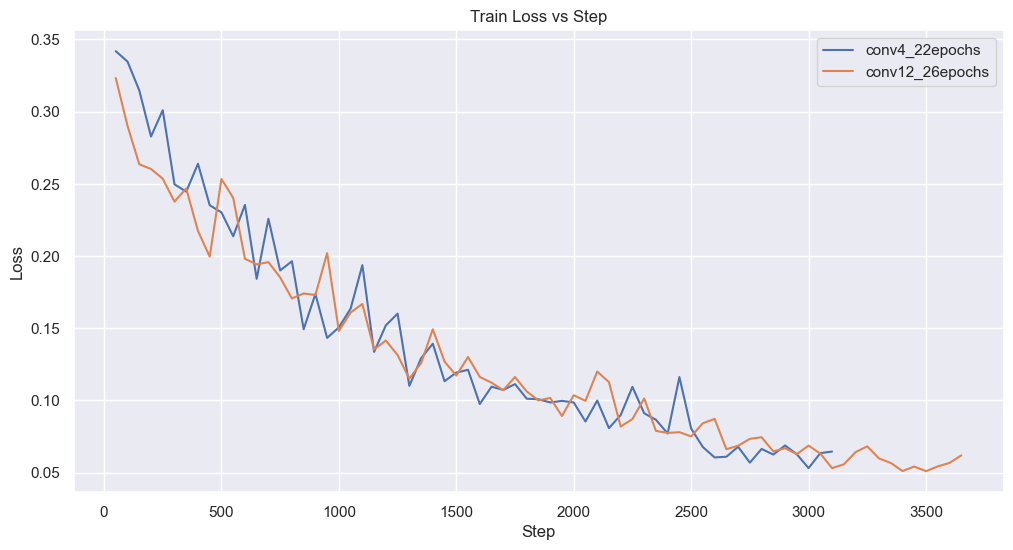

In [ ]:
plt.figure(figsize=(12, 6))
for decoder_type in log_data:
    for num_epochs in log_data[decoder_type]:
        if "train_loss" in log_data[decoder_type][num_epochs]:
            data = log_data[decoder_type][num_epochs]["train_loss"]
            steps = [d["step"] for d in data]
            losses = [d["loss"] for d in data]
            plt.plot(steps, losses, label=f"conv{decoder_type}_{num_epochs}_epochs")

plt.title("Train Loss vs Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

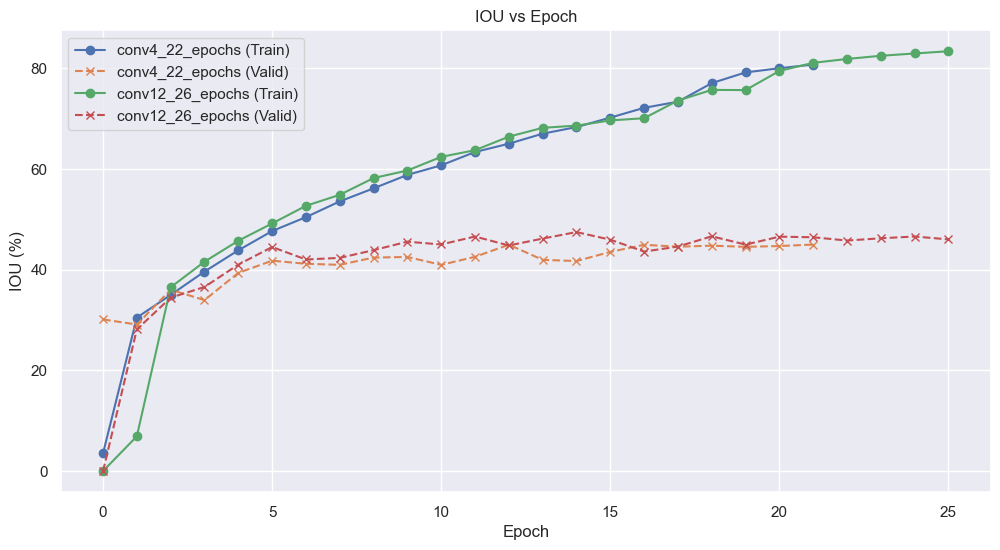

In [14]:
plt.figure(figsize=(12, 6))
for decoder_type in log_data:
    for num_epochs in log_data[decoder_type]:
        # Train IOU
        if "train_iou" in log_data[decoder_type][num_epochs]:
            data = log_data[decoder_type][num_epochs]["train_iou"]
            epochs = [d["epoch"] for d in data]
            ious = [d["iou"] for d in data]
            plt.plot(epochs, ious, "o-", label=f"conv{decoder_type}_{num_epochs}_epochs (Train)")
        
        # Validation IOU
        if "valid_iou" in log_data[decoder_type][num_epochs]:
            data = log_data[decoder_type][num_epochs]["valid_iou"]
            epochs = [d["epoch"] for d in data]
            ious = [d["iou"] for d in data]
            plt.plot(epochs, ious, "x--", label=f"conv{decoder_type}_{num_epochs}_epochs (Valid)")

plt.title("IOU vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("IOU (%)")
plt.legend()
plt.grid(True)
plt.show()

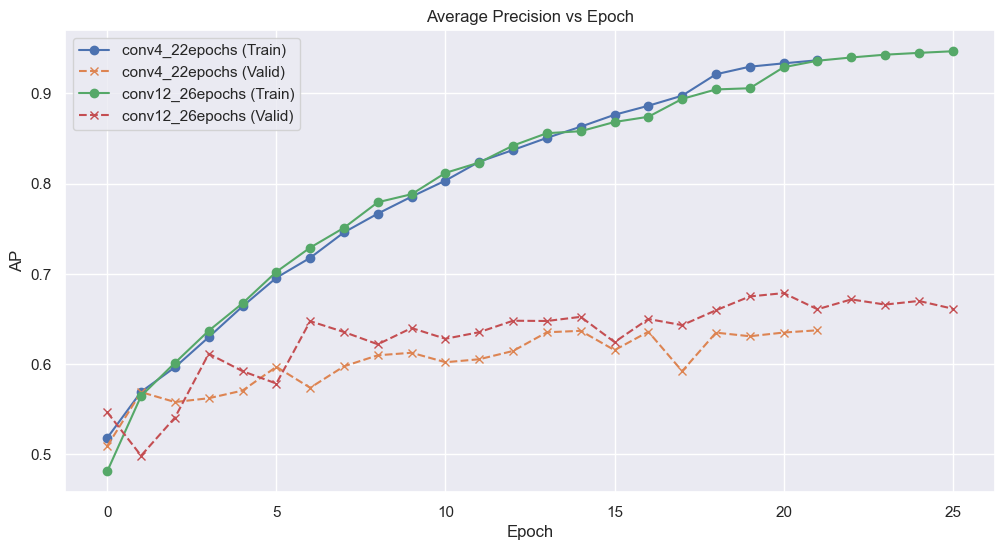

In [15]:
plt.figure(figsize=(12, 6))
for decoder_type in log_data:
    for num_epochs in log_data[decoder_type]:
        # Train AP
        if "train_ap" in log_data[decoder_type][num_epochs]:
            data = log_data[decoder_type][num_epochs]["train_ap"]
            epochs = [d["epoch"] for d in data]
            aps = [d["ap"] for d in data]
            plt.plot(epochs, aps, "o-", label=f"conv{decoder_type}_{num_epochs}epochs (Train)")
        
        # Validation AP
        if "valid_ap" in log_data[decoder_type][num_epochs]:
            data = log_data[decoder_type][num_epochs]["valid_ap"]
            epochs = [d["epoch"] for d in data]
            aps = [d["ap"] for d in data]
            plt.plot(epochs, aps, "x--", label=f"conv{decoder_type}_{num_epochs}epochs (Valid)")

plt.title("Average Precision vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.show()